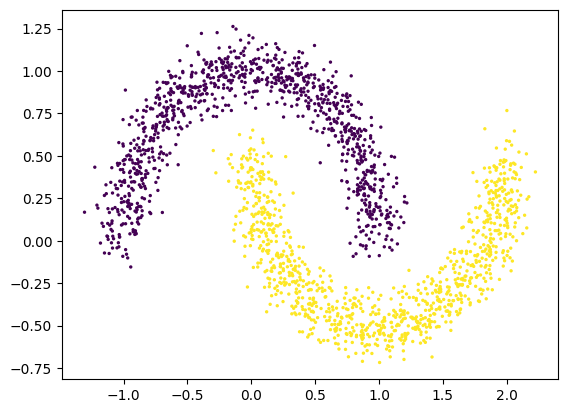

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
n_samples =2000;
np.random.seed(0)
Data, labels = datasets.make_moons(n_samples, noise=0.10)
plt.scatter(Data[:, 0], Data[:, 1], c=labels, s=2, cmap='viridis')

In [ ]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(Data, labels, test_size=0.2, random_state=42)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(50, activation="sigmoid"),
    layers.Dense(50, activation="sigmoid"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
trained = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=10,
                   )
history_dict = trained.history
history_dict.keys()

Epoch 1/20
160/160 [==============================] - 2s 6ms/step - loss: 0.2176 - accuracy: 0.7300
Epoch 2/20
160/160 [==============================] - 2s 9ms/step - loss: 0.1518 - accuracy: 0.8062
Epoch 3/20
160/160 [==============================] - 1s 3ms/step - loss: 0.1153 - accuracy: 0.8206
Epoch 4/20
160/160 [==============================] - 0s 3ms/step - loss: 0.1003 - accuracy: 0.8450
Epoch 5/20
160/160 [==============================] - 0s 2ms/step - loss: 0.0927 - accuracy: 0.8550
Epoch 6/20
160/160 [==============================] - 0s 3ms/step - loss: 0.0880 - accuracy: 0.8656
Epoch 7/20
160/160 [==============================] - 0s 3ms/step - loss: 0.0860 - accuracy: 0.8737
Epoch 8/20
160/160 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 0.8694
Epoch 9/20
160/160 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.8806
Epoch 10/20
160/160 [==============================] - 0s 2ms/step - loss: 0.0855 - accuracy: 0.8725

dict_keys(['loss', 'accuracy'])

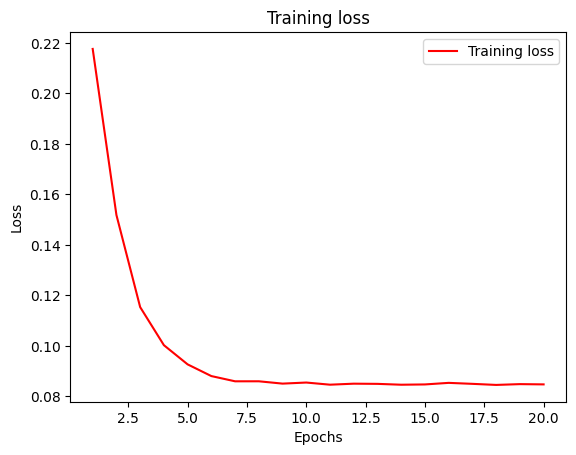

In [ ]:
import matplotlib.pyplot as plt

history_dict = trained.history
loss_values = history_dict["loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r", label="Training loss")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_train, y_train)
print(results)

results = model.evaluate(x_test, y_test)
print(results)

50/50 [==============================] - 0s 2ms/step - loss: 0.0837 - accuracy: 0.8813
[0.08371560275554657, 0.8812500238418579]
13/13 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.8925
[0.07503795623779297, 0.8924999833106995]


63/63 [==============================] - 0s 2ms/step


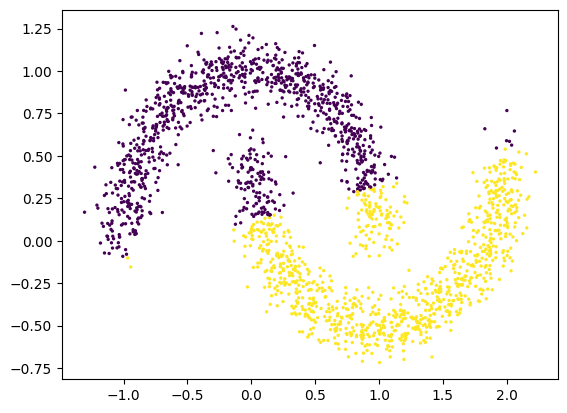

In [ ]:
predictions = (model.predict(Data) > 0.5).astype("int32")
plt.scatter(Data[:, 0], Data[:, 1], c=predictions, s=2, cmap='viridis')
